##### 3-2. 향수 데이터셋에서 주요 향 구성요소의 빈도 탐색 및 시각화

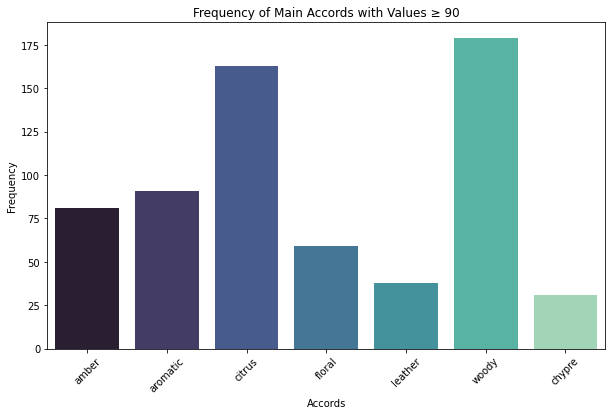

In [2]:
# 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# 데이터셋 로드
perfumes_raw = pd.read_csv('../../Data/preprocess-data/final_perfume-info.csv')

# 텍스트 전처리 전, notes 열에서 결측치가 있는 행은 제거하고 진행
# 결측치가 존재하는 경우, np.nan으로 결측치가 처리되어 float 타입으로 인식되어 전처리가 불가능함
perfumes = perfumes_raw.dropna(subset=['main accords','notes'])

def count_chypre_notes(perfumes, notes):
    chypre_count = 0
    for notes_list in perfumes['notes']:
        # 모든 향을 소문자로 변환하고 공백을 제거
        notes_list = notes_list.lower().replace(' ', '')
        # 쉼표로 분리하여 리스트 생성
        notes_list = notes_list.split(',')
        # 모든 지정된 노트가 존재하는지 확인
        if all(note in notes_list for note in notes):
            chypre_count += 1
    return chypre_count

# oakmoss, bergamot, patchouli를 모두 포함하는 향수의 수 계산
specified_notes = ["oakmoss", "bergamot", "patchouli"]
chypre_count = count_chypre_notes(perfumes, specified_notes)

# 'main accords'에서 값이 50 이상인 향들의 빈도수를 계산
def count_filtered_accords(perfumes, specified_accords):
    filtered_accord_counts = {accord: 0 for accord in specified_accords}
    for accords_json in perfumes['main accords']:
        accords_dict = json.loads(accords_json.replace("'", "\""))  # JSON으로 변환
        for accord, value in accords_dict.items():
            if accord in specified_accords and float(value) >= 90:
                filtered_accord_counts[accord] += 1
    return filtered_accord_counts

# 주요 향 목록
specified_accords = ["amber", "aromatic", "citrus", "floral", "leather", "woody"]
filtered_accord_counts = count_filtered_accords(perfumes, specified_accords)

# 바 차트로 시각화
accord_names = list(filtered_accord_counts.keys()) + ['chypre']  # 'chypre' 추가
accord_values = list(filtered_accord_counts.values()) + [chypre_count]  # chypre_count 추가

plt.figure(figsize=(10, 6))
sns.barplot(x=accord_names, y=accord_values, palette='mako')
plt.title('Frequency of Main Accords with Values ≥ 90')
plt.xlabel('Accords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()